<a href="https://colab.research.google.com/github/krishuynh2222/Predicting_on_time_shipping_with_Machine_Learning/blob/main/Predict_shipment_on_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#load data
df = pd.read_csv("amazon_delivery.csv")

# Data Processing

In [3]:
#Display the 5 first rows
df.head(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,3/19/22,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,3/25/22,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,3/19/22,8:30:00,8:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,4/5/22,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,3/26/22,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
#display rows and columns
df.shape

(43739, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [6]:
df.columns.tolist()

['Order_ID',
 'Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Order_Date',
 'Order_Time',
 'Pickup_Time',
 'Weather',
 'Traffic',
 'Vehicle',
 'Area',
 'Delivery_Time',
 'Category']

In [7]:
df.describe()


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


##### The value listed next to 50% is the median, which is 125 minutes
##### i will define:
##### - 1 (OnTime): Delivery_Time <= 125 minutes
##### - 0 (Late): Delivery_Time > 125 minutes

# Data Cleaning


In [8]:
#checking missing value
df.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [9]:
#checking duplicate values
df.duplicated().sum()

np.int64(0)

In [10]:
#Cleaning data
df.drop_duplicates(inplace=True)
df['Agent_Rating'].fillna(df['Agent_Rating'].median(), inplace=True)
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

/tmp/ipython-input-3616004759.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Agent_Rating'].fillna(df['Agent_Rating'].median(), inplace=True)
/tmp/ipython-input-3616004759.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [11]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

In [12]:
df['Order_DateTime'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'], format='%m/%d/%y %H:%M:%S', errors='coerce')
df['Pickup_DateTime'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'], format='%m/%d/%y %H:%M:%S', errors='coerce')
df.dropna(subset=['Order_DateTime', 'Pickup_DateTime'], inplace=True)

# Feature Engineering

##### i use Haversine formula to calculate the distance between two latitude/longtitude points on Earth

In [13]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371 #Radius of earth in km = 6371

    #Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    #Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

In [14]:
df['Distance_km'] = haversine(df['Store_Latitude'], df['Store_Longitude'],
                              df['Drop_Latitude'], df['Drop_Longitude'])

In [15]:
MAX_DISTANCE_KM = 200
df = df[df['Distance_km'] < MAX_DISTANCE_KM].copy()

#target
df['On_Time'] = (df['Delivery_Time'] <= 125).astype(int)

#Exploratory Data Analysis (EDA)

/tmp/ipython-input-3055109456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='On_Time', data = df, palette='coolwarm')


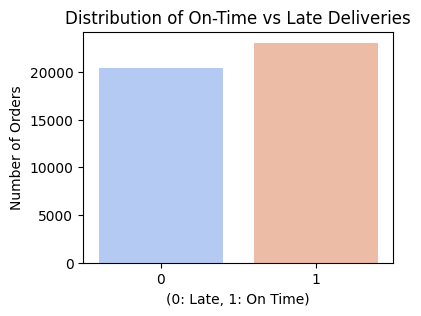

In [16]:
# Target distribution
plt.figure(figsize=(4,3))
sns.countplot(x='On_Time', data = df, palette='coolwarm')
plt.title("Distribution of On-Time vs Late Deliveries")
plt.xlabel('(0: Late, 1: On Time)')
plt.ylabel("Number of Orders")
plt.show()

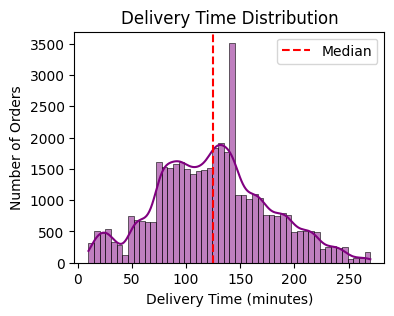

In [17]:
# Delivery time distribution
plt.figure(figsize=(4,3))
sns.histplot(df['Delivery_Time'], bins=50, kde=True, color='purple')
plt.axvline(df['Delivery_Time'].median(), color='red', linestyle='--', label='Median')
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()

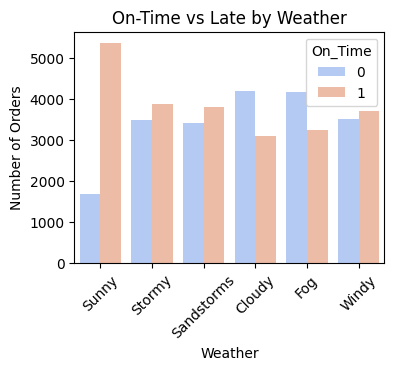

In [18]:
# Weather impact
plt.figure(figsize=(4,3))
sns.countplot(x='Weather', hue='On_Time', data=df, palette='coolwarm')
plt.title("On-Time vs Late by Weather")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

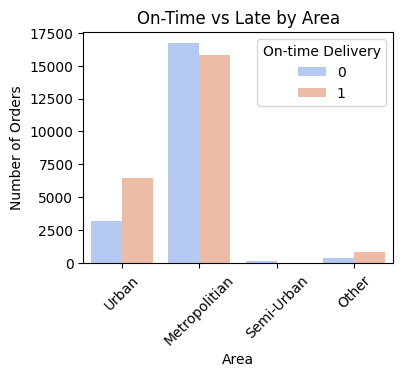

In [19]:
# Area vs Delivery Status
plt.figure(figsize=(4,3))
sns.countplot(x='Area', hue='On_Time', data=df, palette='coolwarm')
plt.title('On-Time vs Late by Area')
plt.xlabel('Area')
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title='On-time Delivery')
plt.show()

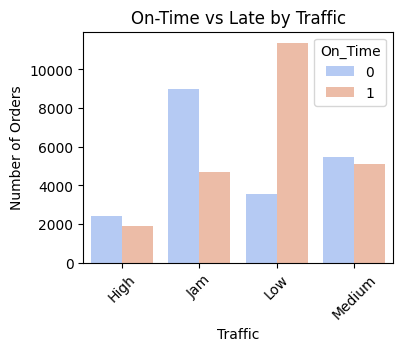

In [20]:
# Traffic impact
plt.figure(figsize=(4,3))
sns.countplot(x='Traffic', hue='On_Time', data=df, palette='coolwarm')
plt.title("On-Time vs Late by Traffic")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

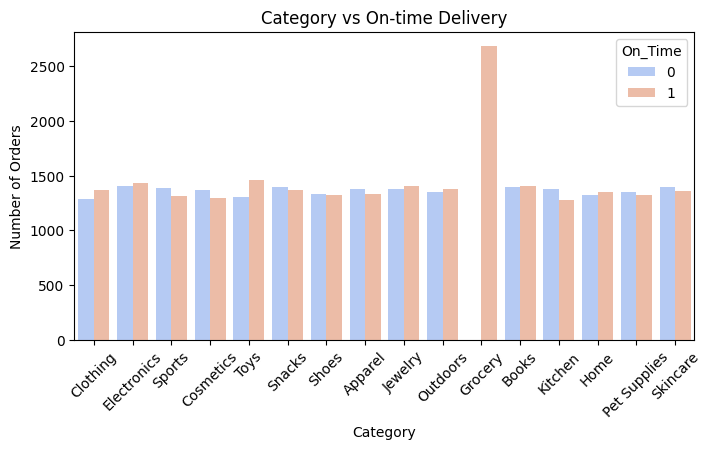

In [21]:
# Category vs Delivery Status
plt.figure(figsize=(8,4))
sns.countplot(x='Category', hue='On_Time', data=df, palette='coolwarm')
plt.title('Category vs On-time Delivery')
plt.xlabel('Category')
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1061148114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='On_Time', y='Agent_Rating', data=df, palette='coolwarm')


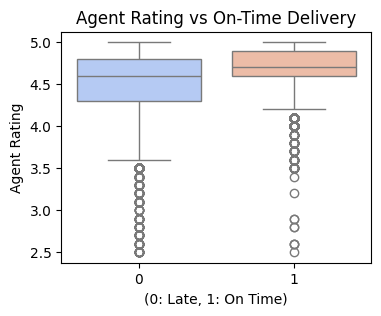

In [22]:
# Agent rating vs On-Time
plt.figure(figsize=(4,3))
sns.boxplot(x='On_Time', y='Agent_Rating', data=df, palette='coolwarm')
plt.xlabel('(0: Late, 1: On Time)')
plt.title("Agent Rating vs On-Time Delivery")
plt.ylabel("Agent Rating")
plt.show()

/tmp/ipython-input-1064550521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='On_Time', y='Agent_Age', data=df, palette='coolwarm')


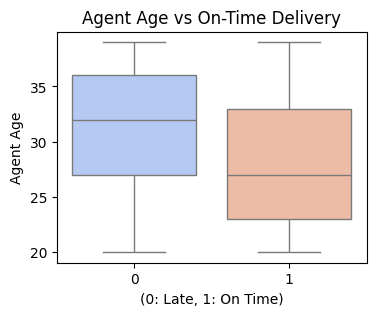

In [23]:
# Agent age vs On-Time
plt.figure(figsize=(4,3))
sns.boxplot(x='On_Time', y='Agent_Age', data=df, palette='coolwarm')
plt.xlabel('(0: Late, 1: On Time)')
plt.title("Agent Age vs On-Time Delivery")
plt.ylabel("Agent Age")
plt.show()

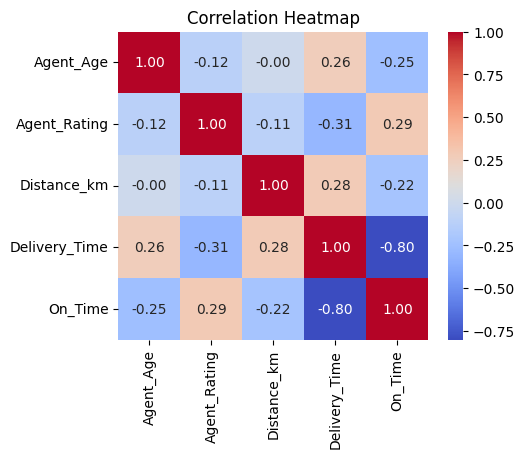

In [24]:
# Correlation heatmap
numeric_cols = ['Agent_Age', 'Agent_Rating', 'Distance_km', 'Delivery_Time']
plt.figure(figsize=(5,4))
sns.heatmap(df[numeric_cols + ['On_Time']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Train/Test Split & Scaling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score

#### I will split 80% for training and 20% for testing

In [26]:
#One-hot encoding
categorical_features = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df_encoded['Order_Hour'] = df_encoded['Order_DateTime'].dt.hour
df_encoded = pd.get_dummies(df_encoded, columns=['Order_Hour'], prefix='Order_Hour', drop_first=True)

In [27]:
# Identify columns to drop
drop_cols = ['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time',
             'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude',
             'Order_DateTime', 'Pickup_DateTime', 'Delivery_Time', 'On_Time']

# Separate features (X) and target (y)
X = df_encoded.drop(columns=drop_cols, axis=1)
y = df_encoded['On_Time']

In [28]:
df_encoded.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Order_Hour_14,Order_Hour_15,Order_Hour_16,Order_Hour_17,Order_Hour_18,Order_Hour_19,Order_Hour_20,Order_Hour_21,Order_Hour_22,Order_Hour_23
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,3/19/22,11:30:00,11:45:00,...,False,False,False,False,False,False,False,False,False,False
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,3/25/22,19:45:00,19:50:00,...,False,False,False,False,False,True,False,False,False,False
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,3/19/22,8:30:00,8:45:00,...,False,False,False,False,False,False,False,False,False,False
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,4/5/22,18:00:00,18:10:00,...,False,False,False,False,True,False,False,False,False,False
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,3/26/22,13:30:00,13:45:00,...,False,False,False,False,False,False,False,False,False,False


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Identify numerical columns for scaling
numerical_cols = ['Agent_Age', 'Agent_Rating', 'Distance_km']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

###Apply Models
##### We will use models:

##### - Logistic regression
##### - SVM
##### And i will pick up the best model base on accuracy score

In [31]:
#Logistic Regression - model training
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4086
           1       0.81      0.79      0.80      4613

    accuracy                           0.79      8699
   macro avg       0.79      0.79      0.79      8699
weighted avg       0.79      0.79      0.79      8699



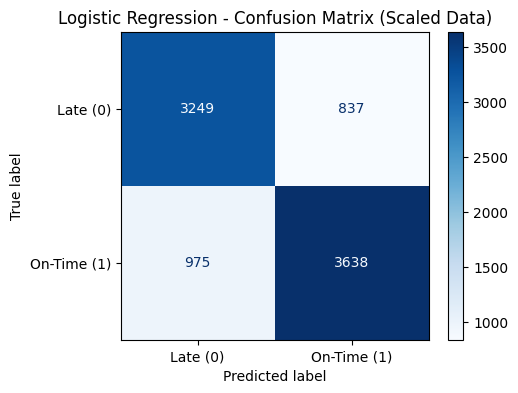

In [32]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
fig, ax = plt.subplots(figsize=(5,4))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Late (0)", "On-Time (1)"])
disp_lr.plot(cmap="Blues", values_format='d', ax=ax)
plt.title("Logistic Regression - Confusion Matrix (Scaled Data)")
plt.show()


In [33]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True, class_weight='balanced')
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      4086
           1       0.82      0.79      0.80      4613

    accuracy                           0.80      8699
   macro avg       0.80      0.80      0.80      8699
weighted avg       0.80      0.80      0.80      8699



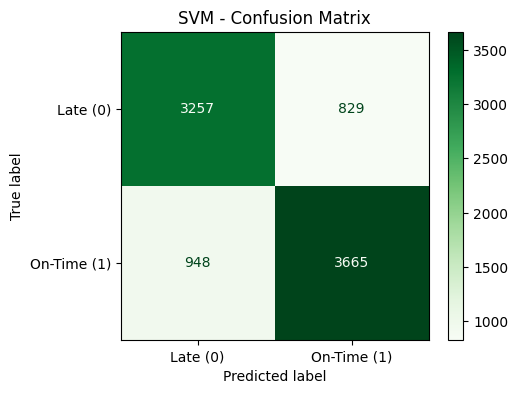

In [34]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plt.subplots(figsize=(5,4))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Late (0)", "On-Time (1)"])
disp_svm.plot(cmap="Greens", values_format='d', ax=ax)
plt.title("SVM - Confusion Matrix")
plt.show()

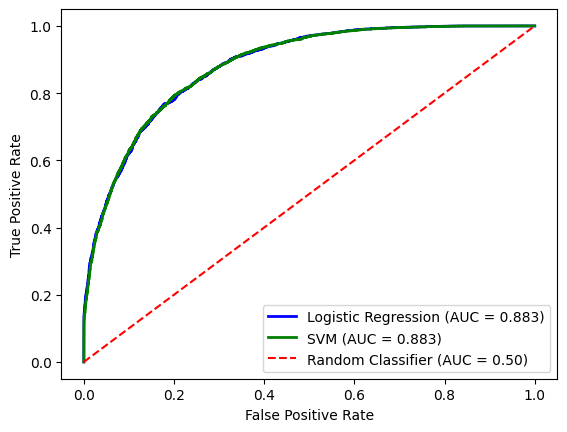

In [35]:
# Plot Logistic Regression ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr,
         label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})',
         color='blue',
         linewidth=2)

# Plot SVM ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm,
         label=f'SVM (AUC = {roc_auc_svm:.3f})',
         color='green',
         linewidth=2)

# Plot the baseline (random classifier)
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='red',
         label='Random Classifier (AUC = 0.50)',
         linewidth=1.5)

# Set title and labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize=10)

plt.show()

##### Even though the accuracies for the two models are similar, the model with the higher AUC score will be more reliable because it takes into account the predicted probability. It is more likely to give you higher accuracy when predicting future data.

In [36]:
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Select key numerical features for clustering
cluster_features = ['Delivery_Time', 'Distance_km', 'Agent_Rating', 'Agent_Age']
X_cluster = df[cluster_features].copy()

In [37]:
# Scale data using RobustScaler
robust_scaler = RobustScaler()
X_cluster_scaled = robust_scaler.fit_transform(X_cluster)

In [38]:
#Optimize using PCA: Reduce from 4 dimensions to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

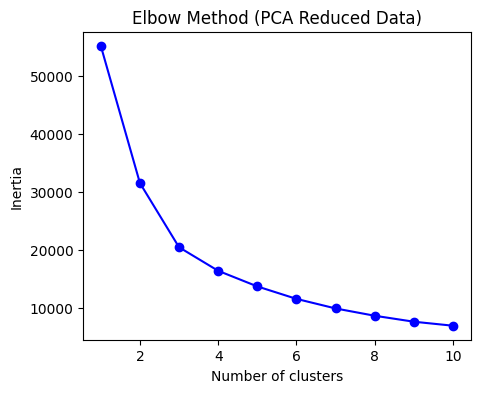

In [39]:
# Elbow method on X_pca
inertias = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
  # Use X_pca
  kmeans.fit(X_pca)
  inertias.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(5,4))
plt.plot(range(1,11), inertias, marker='o', color='blue')
plt.title('Elbow Method (PCA Reduced Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [40]:
# Apply final K-Means (using K=4)
k = 4
kmeans_final = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
# Use X_pca
cluster_labels = kmeans_final.fit_predict(X_pca)

df['Cluster_PCA'] = cluster_labels

# Print K-Means Cluster Analysis
print("\n--- K-Means Cluster Analysis (Mean Values - Using PCA) ---")
cluster_analysis = df.groupby('Cluster_PCA')[cluster_features].mean()
print(cluster_analysis.round(2))


--- K-Means Cluster Analysis (Mean Values - Using PCA) ---
             Delivery_Time  Distance_km  Agent_Rating  Agent_Age
Cluster_PCA                                                     
0                   191.51        15.18          4.70      31.98
1                    72.89         6.02          4.72      26.88
2                   174.05        10.73          4.05      31.80
3                   124.01        10.34          4.76      29.96


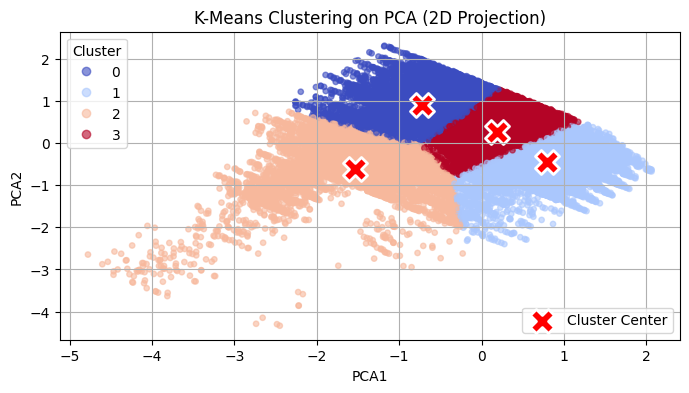

In [41]:
# Visualization (on 2 PCA components)
plt.figure(figsize=(8,4))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
                      c=df['Cluster_PCA'], cmap='coolwarm', s=15, alpha=0.6)

# Add red X markers for cluster centers
centers_pca = kmeans_final.cluster_centers_  # (k, 2) centers in PCA space
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            s=300, c='red', marker='X', edgecolor='white',
            linewidth=2, label='Cluster Center')


plt.title('K-Means Clustering on PCA (2D Projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
legend1 = plt.legend(*scatter.legend_elements(), loc="upper left", title="Cluster")
plt.gca().add_artist(legend1)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()